In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load dataset

In [2]:
df = pd.read_csv('../data/creditcard.csv')
print('Number of samples: %d' % df.shape[0])
df.head()

Number of samples: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Target classes

Counts
0    0.998273
1    0.001727
Name: Class, dtype: float64


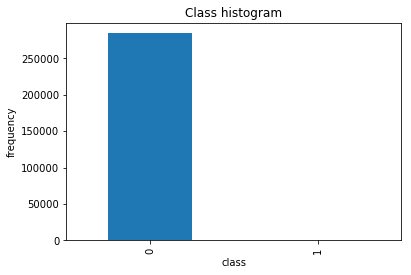

In [3]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index()
print('Counts')
print(count_classes / len(df))
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("class")
plt.ylabel("frequency")

# Split dataset in training/testing

In [4]:
from math import ceil

df = df.sample(frac=1)
df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

p = 0.2
idx = len(df0) - ceil(p*len(df0))
df0_train = df0[:idx]
df0_test = df0[idx:]

idx = len(df1) - ceil(p*len(df1))
df1_train = df1[:idx]
df1_test = df1[idx:]


frames = [df0_train, df1_train] 
df_train = pd.concat(frames)
frames = [df0_test, df1_test] 
df_test = pd.concat(frames)

In [5]:
count_classes = pd.value_counts(df_train['Class'], sort=True).sort_index()
print('Counts train')
print(count_classes)

count_classes = pd.value_counts(df_test['Class'], sort=True).sort_index()
print('Counts test')
print(count_classes)


count_classes = pd.value_counts(df_train['Class'], sort=True).sort_index()
print('Relative counts train')
print(count_classes / len(df_train))

count_classes = pd.value_counts(df_test['Class'], sort=True).sort_index()
print('Relative counts test')
print(count_classes / len(df_test))

Counts train
0    227452
1       393
Name: Class, dtype: int64
Counts test
0    56863
1       99
Name: Class, dtype: int64
Relative counts train
0    0.998275
1    0.001725
Name: Class, dtype: float64
Relative counts test
0    0.998262
1    0.001738
Name: Class, dtype: float64


# Rescale datatasets according to traning

In [6]:
columns = df_train.drop(['Time', 'Class'], 1).columns

mean, std = df_train[columns].mean(), df_train[columns].std()
df_train.loc[:, columns] = (df_train.loc[:, columns] - mean) / std
df_test.loc[:, columns] = (df_test.loc[:, columns] - mean) / std

df_train.to_csv('../data/creditcard_train.csv')
df_test.to_csv('../data/creditcard_test.csv')

print('Done!')

Done!
